<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Air Quality forecasting(CO2 emissions)  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>



<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          To forecast Co2 levels for an organization so that the organization can follow government norms
with respect to Co2 emission levels.
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [81]:
#Importing libraries
import warnings
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss 

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

from matplotlib import pyplot# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import the data
data = pd.read_csv('CO2 dataset.csv')
data.head()                   # will show 1st 5 rows only

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [ ]:
data=data.loc[:214]
data.shape  # will show rows and columns

(215, 2)

In [ ]:

data.isnull().sum()          # This functin will show the total null values in our data

Year    0
CO2     0
dtype: int64

In [ ]:
data.info()             # this function will show the all information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [ ]:
data.describe()          # This function will describe the data

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [ ]:
data.skew()  # positively skewed

Year    0.000000
CO2     0.362736
dtype: float64

In [ ]:
len(data[data['CO2']<1]) # 37% CO2 values are less then 1 

80

In [ ]:
data[data['CO2'] == data['CO2'].max()]


,Year,CO2
179,1979.0,18.2


In [ ]:
data[data.duplicated()]              # No duplicated data present in ur dataset

,Year,CO2


In [ ]:
data['Year'] = data['Year'].astype(int)      #convert the year column from float to int
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


<h2 style="color:#DC7633;">Visualization </h2>


In [ ]:

data.index = pd.to_datetime(data['Year'], format='%Y')
data.drop('Year',axis=1, inplace=True)
data.head()


,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542



<h2 style="color:#DC7633;">Density Plot</h2>


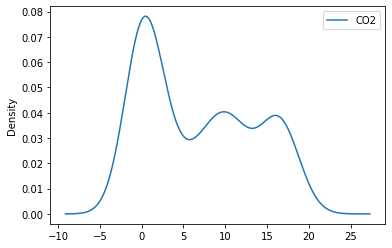

In [ ]:
data.plot(kind='kde')
pyplot.show()

5 <h2 style="color:#DC7633;">Histogram</h2>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f473089b4d0>]],
      dtype=object)

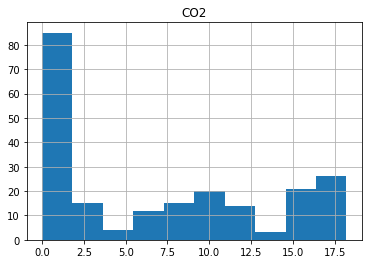

In [ ]:
 data.hist()



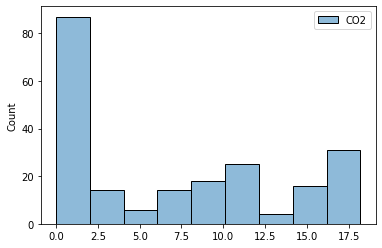

In [ ]:
 import seaborn as sns
sns.histplot(data) 


<h2 style="color:#DC7633;">Line plot</h2>


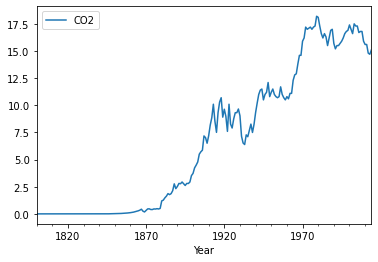

In [ ]:
data.plot()              # we can see there is a upword trend in plot

<h2 style="color:#DC7633;">Box Plot</h2>


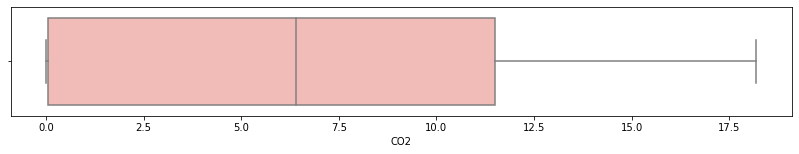

In [ ]:
# Boxplot for ever
import seaborn as sns
plt.figure(figsize=(14,2))
sns.boxplot(x = data['CO2'], palette='Pastel1')

<h2 style="color:#DC7633;">Lag Plot</h2>


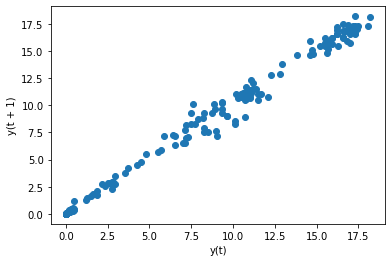

In [ ]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(data)
pyplot.show()                  # data is linear

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) After the total observation we can see the trend of our data and we have higher rate between -5 to +5<br><br>
          2) There is trend in ur data because after some perid its going high suddenly and its moving up direction<br><br>
           3) The Data is linear we can see using log plot
        </p>
    </div>



<h2 style="color:#DC7633;">seasonal_decomposet</h2>


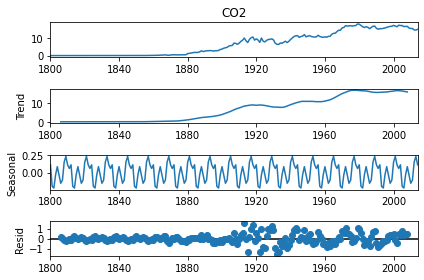

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.CO2,period=12)
decompose_ts_add.plot()
plt.show()

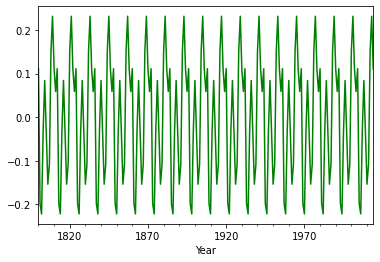

In [ ]:
seasonality=decompose_ts_add.seasonal
seasonality.plot(color='green')

 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) In the seasonality graph, we can see the seasonality structure for every year, which is cyclic and repeatedly providing the same value. <br><br>
  2) To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an              autocorrelation plot.<br>
        </p>
    </div>

<h2 style="color:#DC7633;">ACF Plot</h2>


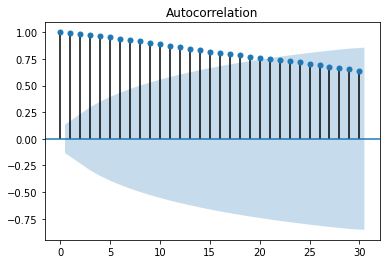

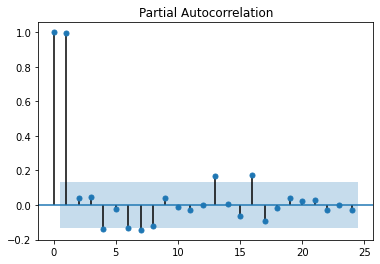

In [ ]:
#To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.
# It will check the correlation between previous data 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data,lags=30)
plot_pacf(data)
pyplot.show()


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1)  Here the blue area is the confidence interval<br><br>
         2) Each candle is present on previous or historical data it means if we know the historical/Past year CO2 then we             can forecast next year CO2 <br><br>
           3) There are strongly psitive correlation 
    </p>
    </div>


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 4 : Pre-Process Data </h2> 

<h3 style="color:orange;">Stationary data means? </h3>

1) constant mean

2) constant variance

3) constant covariance (uncorrelated)

We verify this by observing change in mean, variance, autocorrelation and with a statistical test (ADFuller test)


 <h3 style="color:green;">Following are the Techniques to check data is stationary or not ?</h3>

1) Augmented Dickey-fuller test

2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

3) Rolling Statistics


<h3 style="color:blue;">1) Augmented Dickey-fuller test or not? </h3>


In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")


print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data['CO2'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

Observations of Dickey-fuller test

 > Is the de-trended data stationary ?
Test statistic = -0.378
P-value = 0.914
Critical values :
	1%: -3.4612821203214907 - The data is not stationary with 99% confidence
	5%: -2.875142613826617 - The data is not stationary with 95% confidence
	10%: -2.574020122281422 - The data is not stationary with 90% confidence


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        Augmented Dicky Fuller test is a statistical test for stionarity.<br> 
        If the p value is less than 0.05, the series is stationary, otherwise non-stationary. 
    </p>
    </div>

<h3 style="color:blue;">2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS) or not? </h3>


In [ ]:
result_kpss_ct_log=kpss(data['CO2'],regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.220000
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.      
    </p>
    </div>

 <h3 style="color:blue;">3) Rolling Statistics Test</h3>


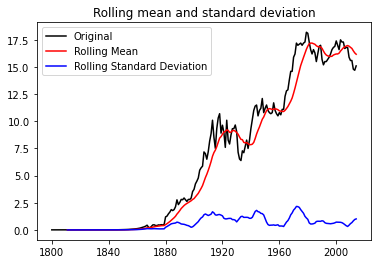

In [ ]:
rmean=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        In this graph we can see mean and variance is not constant so we can say our data is non stationary 
    </p>
    </div>

  <h2 style="color:Orange;">    Making Time Series Stationary Test</h2>
<h3 style="color:Green;">    Differencing Test</h3>
<h4 style="color:blue;">  First  Differencing Test</h4>


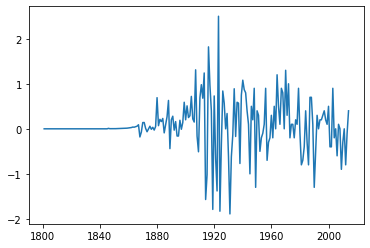

In [ ]:
import numpy as np

 # making the data stationary
#data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
#plt.plot(data['First Difference'])
#data1=data.copy()
data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
plt.plot(data['First Difference'])

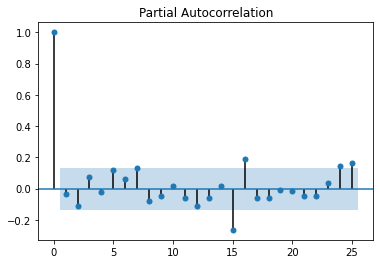

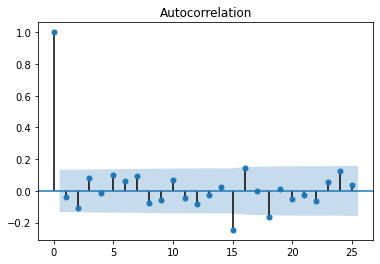

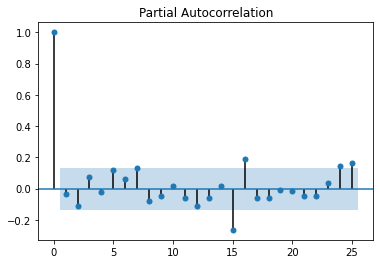

In [ ]:
plot_acf(data['First Difference'].dropna(),lags=25)
plot_pacf(data['First Difference'].dropna(),lags=25)

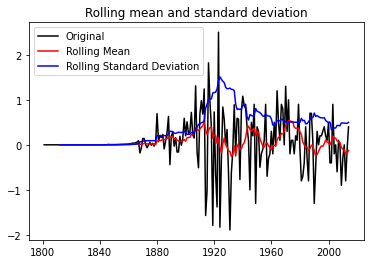

In [ ]:
rmean=data['First Difference'].rolling(window=12).mean()
rstd=data['First Difference'].rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data['First Difference'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(data['First Difference'].dropna(),autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

 > Is the data stationary ?
Test statistic = -3.780
P-value = 0.003
Critical values :
	1%: -3.4638151713286316 - The data is  stationary with 99% confidence
	5%: -2.876250632135043 - The data is  stationary with 95% confidence
	10%: -2.574611347821651 - The data is  stationary with 90% confidence


In [ ]:
result_kpss_ct_log=kpss(data['First Difference'].dropna(),regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.110000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) p value is less than 0.05, the series is stationary. <br>
        2) In this graph we can see mean and variance is not constant so we can say our data is non stationary<br> 
         3) If the p-value is greater than a predefined alpha level (typically 0.05), we accept the null hypothesis.      
    </p>
    </div>

In [ ]:
 data

,CO2,First Difference
Year,,
1800-01-01,0.00568,NaN
1801-01-01,0.00561,-0.00007
1802-01-01,0.00555,-0.00006
1803-01-01,0.00548,-0.00007
1804-01-01,0.00542,-0.00006
...,...,...
2010-01-01,15.60000,-0.30000
2011-01-01,15.60000,0.00000
2012-01-01,14.80000,-0.80000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [ ]:
Train = data.head(180)
Test =data.tail(35)

In [ ]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

  <h2 style="color:Orange;">  Simple Exponential Method</h2>


MAE: 0.7594402120707794
RMSE : 0.9711142323936686 
MAPE : 4.810371631853253


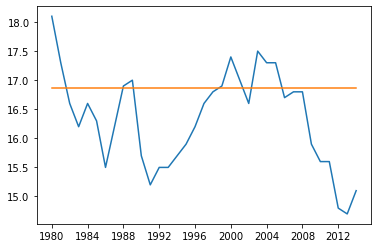

In [ ]:

ses_model = SimpleExpSmoothing(Train['CO2']).fit(smoothing_level=0.2)
#ses_model = SimpleExpSmoothing(Train.CO2).fit(smoothing_level=0.3, optimized=False)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])

plt.plot(Test.CO2)
plt.plot(pred_ses)

rmse = sqrt(mean_squared_error(Test.CO2, pred_ses))
print('MAE:', mean_absolute_error(Test.CO2,pred_ses)) 
print('RMSE :',rmse ,'\n''MAPE :',MAPE(pred_ses,Test.CO2))





  <h2 style="color:Orange;"> Holt method</h2>


RMSE : 1.9823784453655764 
MAPE : 9.152120317490075
MAE: 1.4697652088725872


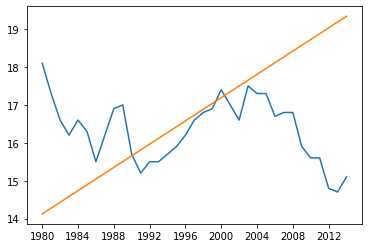

In [ ]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.02, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse = sqrt(mean_squared_error(Test.CO2, pred_hw))
plt.plot(Test.CO2)
plt.plot(pred_hw)
print('RMSE :',rmse ,'\n''MAPE :',MAPE(pred_hw,Test.CO2))
print('MAE:', mean_absolute_error(Test.CO2,pred_hw)) 

 

  <h2 style="color:Orange;"> Holts winter exponential smoothing with additive seasonality and additive trend
</h2>



RMSE : 5.109619692304882 
MAPE : 29.337181360060075
MAE: 4.717558369938694


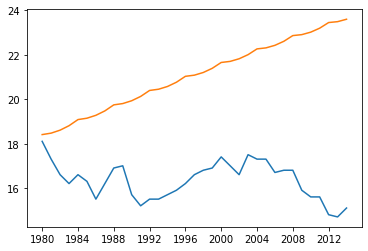

In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
#MAPE(pred_hwe_add_add,Test.CO2)
plt.plot(Test.CO2)
plt.plot(pred_hwe_add_add)
rmse = sqrt(mean_squared_error(Test.CO2, pred_hwe_add_add))
print('RMSE :',rmse ,'\n''MAPE :',MAPE(pred_hwe_add_add,Test.CO2))
print('MAE:', mean_absolute_error(Test.CO2,pred_hwe_add_add)) 

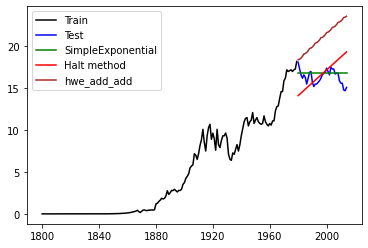

In [ ]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["CO2"], label='Train',color="black")
plt.plot(Test.index, Test["CO2"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Halt method',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="hwe_add_add",color="brown")
plt.legend(loc='best')

In [ ]:
##### separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
#train1 = pd.read_excel('CO2 dataset.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
X = data['CO2'].values
train, test = X[1:180], X[180:]


In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
MAPE=MAPE(predictions,test)
print('\nRMSE :',rmse)
print('MAE:', mean_absolute_error(test,predictions)) 
print('MAPE :',MAPE)

>Predicted=18.200, Expected=18.100
>Predicted=18.100, Expected=17.300
>Predicted=17.300, Expected=16.600
>Predicted=16.600, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.300
>Predicted=16.300, Expected=15.500
>Predicted=15.500, Expected=16.200
>Predicted=16.200, Expected=16.900
>Predicted=16.900, Expected=17.000
>Predicted=17.000, Expected=15.700
>Predicted=15.700, Expected=15.200
>Predicted=15.200, Expected=15.500
>Predicted=15.500, Expected=15.500
>Predicted=15.500, Expected=15.700
>Predicted=15.700, Expected=15.900
>Predicted=15.900, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.800
>Predicted=16.800, Expected=16.900
>Predicted=16.900, Expected=17.400
>Predicted=17.400, Expected=17.000
>Predicted=17.000, Expected=16.600
>Predicted=16.600, Expected=17.500
>Predicted=17.500, Expected=17.300
>Predicted=17.300, Expected=17.300
>Predicted=17.300, Expected=16.700
>Predicted=16.700, Expected=16.800
>Predicted=16.800, E


  <h2 style="color:Orange;">   ARIMA Hyperparameters</h2>


In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
print(rmse)

0.5096217084409629



<h2 style="color:Orange;">  Grid search for p,d,q values</h2>


In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:

# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=10.516
ARIMA(0, 0, 1) RMSE=5.438
ARIMA(0, 1, 0) RMSE=0.533
ARIMA(0, 1, 1) RMSE=0.542
ARIMA(0, 1, 2) RMSE=0.532
ARIMA(0, 2, 0) RMSE=0.687
ARIMA(0, 2, 1) RMSE=0.569
ARIMA(0, 2, 2) RMSE=0.584
ARIMA(1, 0, 0) RMSE=0.507
ARIMA(1, 1, 0) RMSE=0.541
ARIMA(1, 1, 1) RMSE=0.541
ARIMA(1, 1, 2) RMSE=0.530
ARIMA(1, 2, 0) RMSE=0.685
ARIMA(1, 2, 1) RMSE=0.581
ARIMA(2, 0, 0) RMSE=0.509
ARIMA(2, 1, 0) RMSE=0.534
ARIMA(2, 1, 1) RMSE=0.531
ARIMA(2, 1, 2) RMSE=0.534
ARIMA(2, 2, 0) RMSE=0.620
ARIMA(2, 2, 1) RMSE=0.582
ARIMA(2, 2, 2) RMSE=0.576
Best ARIMA(1, 0, 0) RMSE=0.507


<h2 style="color:Orange;">  Build Model based on the optimized values</h2>


In [ ]:
##### save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
train_data = data.loc[:'2000-01-01','CO2']
test_data = data.loc['2000-01-01':]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg


# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=15).fit()

# Print Summary
#print(ar_model.summary())

RMSE: 2.8993895391271165
MAE: 2.4944883862327614


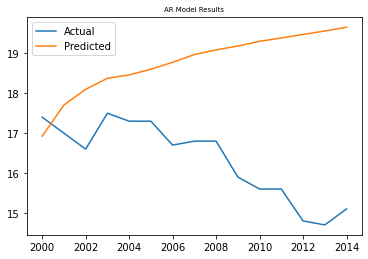

In [ ]:
ar_forecast = ar_model.predict('2000-01-01', '2014-01-01')

plt.title('AR Model Results', size=7)
plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
plt.plot(ar_forecast,label='Predicted')
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],ar_forecast)))
print('MAE:', mean_absolute_error(data.loc['2000-01-01':,'CO2'],ar_forecast))

RMSE: 0.5778821815728581
MAE: 0.4887965066595153


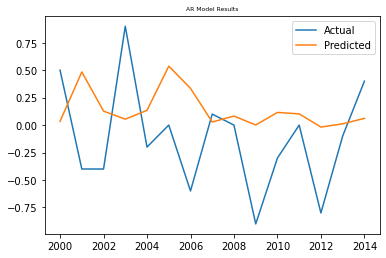

In [ ]:
train_datafd = data.loc['1801-01-01':'2000-01-01','First Difference']

# Instantiate and fit the AR model with training data
ar_modelfd = AutoReg(train_datafd, lags=15).fit()

# Print Summary
#print(ar_modelfd.summary())

ar_forecastfd = ar_modelfd.predict('2000-01-01', '2014-01-01')
plt.title('AR Model Results', size=6)
plt.plot(data.loc['2000-01-01':,'First Difference'],label='Actual')
plt.plot(ar_forecastfd,label='Predicted')
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd)))
print('MAE:',mean_absolute_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd))

RMSE: 0.49279580387153366
MAE 0.40361768499371414
MAPE 6008612661506823.0


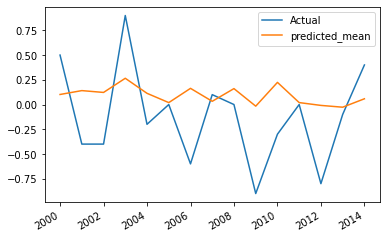

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

arima2 = ARIMA(data.loc[:,'First Difference'], order=(7, 1, 2))
results2 = arima2.fit()
predictions2 = results2.predict('2000-01-01', '2014-01-01')

plt.plot(data.loc['2000-01-01':,'First Difference'],label='Actual')
predictions2.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'First Difference'],predictions2)))
print('MAE',mean_absolute_error(data.loc['2000-01-01':,'First Difference'],predictions2))
print('MAPE',mean_absolute_percentage_error(data.loc['2000-01-01':,'First Difference'],predictions2)*100) 

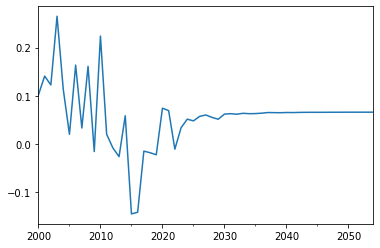

In [ ]:
 import pickle
with open('arimafoo.pkl', 'wb') as pkl:
    pickle.dump(results2, pkl)
    
with open('arimafoo.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)
    
start = '2000-01-01'
end = '2054-01-01'
pickle_preds.predict(start, end).plot()

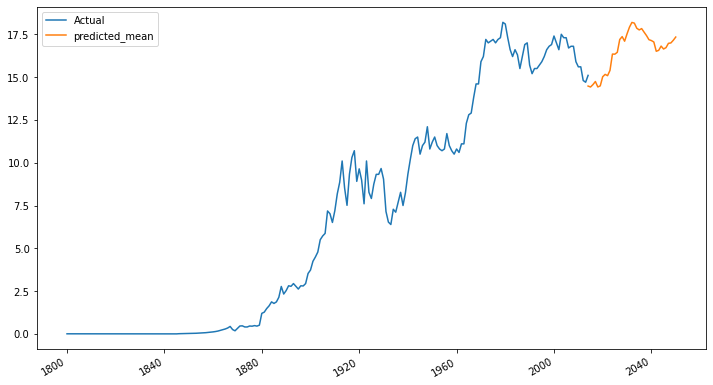

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(data.loc[:,'CO2'], order=(28, 2 ,20))
resultf = arima.fit()
predictionf = resultf.predict('2014-01-01', '2050-01-01')
plt.figure(figsize=(12,7))
plt.plot(data.loc[:,'CO2'],label='Actual')
predictionf.plot()
plt.legend();

In [ ]:
import pickle
with open('arimaf.pkl', 'wb') as pkl:
    pickle.dump(resultf, pkl)
with open('arimaf.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)

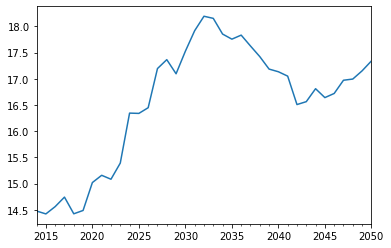

In [ ]:
pickle_preds.predict('2014-01-01', '2050-01-01').plot() 

In [ ]:
#Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.06s


In [ ]:
%%writefile main.py 

import streamlit as st

import pandas as pd

import plotly

import pickle

import plotly.graph_objs as go


def load_data():

  #load original data

    df_original = pd.read_csv('CO2 dataset.csv')

    df_original.index = pd.to_datetime(df_original['Year'], format='%Y')

    df_original.drop('Year', axis=1, inplace=True)

    return df_original



def load_pkl():

    # load pkl file

    pickled_model = pickle.load(open('arimafoo.pkl', 'rb'))

    return pickled_model



def user_input():

    # user input select boxes

    start = str(st.sidebar.selectbox(label='enter start', options=range(2015, 2050)))

    end = str(st.sidebar.selectbox(label='enter end', options=range(2016, 2051)))

    return start, end



def predict(end):

    # prediction using pkl

    df = pd.DataFrame(load_pkl().predict('2015', end))

    df.columns = ['CO2']


    for i in range(len(df)):

        if i == 0:

            df.iloc[0, ] = df.iloc[0, ] + load_data().iloc[-1, ]

        else:

            df.iloc[i, ] = df.iloc[i, ] + df.iloc[i-1, ]


    # merge original and predicted data

    data = pd.concat([load_data(), df])

    data.index = data.index.map(lambda x: x.strftime('%Y'))

    data.index.name = 'Year'

    return data



def plot_raw_data(data):

    fig = plotly.graph_objects.Figure()

    fig.update_layout(width=850, height=650)

    fig.add_trace(go.Scatter(x=data.index, y=data['CO2'], name='Air Quality'))

    fig.layout.update(title_text="Yearly CO2 levels", xaxis_title='Years')

    fig.update_traces(mode="lines", hovertemplate=None)

    fig.update_layout(hovermode="x unified", yaxis_title='CO2 levels', xaxis_rangeslider_visible=True)

    st.plotly_chart(fig)



def main():

    # Title

    st.title('Air Quality Forecasting')

    st.sidebar.title('User Input')

    ui_input = user_input()


    # display forecasted values

    st.sidebar.subheader('Forecasted Values')

    st.sidebar.dataframe(predict(ui_input[1]).loc[ui_input[0]:ui_input[-1], ],width=2000)


    # display past values

    st.sidebar.subheader('Past Values')

    st.sidebar.dataframe(predict(ui_input[1]).loc['1800':'2014', ], width=2000)


    # plot the data

    plot_raw_data(predict(ui_input[1]))



if __name__ == '__main__':

    main()

Overwriting main.py


In [ ]:

!streamlit run main.py & npx localtunnel --port 8501 
